In [1]:
import cvxopt
from cvxopt import matrix, solvers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
from sklearn.model_selection import StratifiedShuffleSplit
MIN_SUPPORT_VECTOR_MULTIPLIER = 1e-4
COLORS = ['red', 'blue']

In [2]:
class SVM(object):
    def __init__(self):
        pass
        #self._c=c
    
    
    def get_alphas(self,x,y):
        n_samples, n_features = x.shape
        K = y[:, None] * x
        K = np.dot(K, K.T)
        P = matrix(K)
        q = matrix(-np.ones((n_samples, 1)))
        G = matrix(-np.eye(n_samples))
        h = matrix(np.zeros(n_samples))
        A = matrix(y.reshape(1, -1))
        b = matrix(np.zeros(1))
        solvers.options['show_progress'] = False
        solution = solvers.qp(P, q, G, h, A, b)
        alphas = np.array(solution['x'])
        return alphas
    
    def get_w_b(self,x,y,alphas):
        w = np.sum(alphas * y[:, None] * x, axis = 0)
        cond = (alphas > 1e-4).reshape(-1)
        b = y[cond] - np.dot(x[cond], w)
        #bias = int(np.mean(b))
        return w,b[0]
    
    def predictor(self,w,b,x):
        pre=np.dot(x,w)+b
        pre = np.sign(pre)
        return pre
    
    def accuracy(self,y, y_pred):
        return np.sum(y == y_pred) / len(y)
    

In [3]:
def generate_gaussian(m, c, num):
    return np.random.multivariate_normal(m, c, num)


def plot_data_with_labels(x, y):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        plt.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])
    plt.show()


def plot_data_with_ax(x, y, ax):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        ax.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])
    
def plot_separator(ax, w, b):
        slope = -w[0] / w[1]
        intercept = -b / w[1]
        x = np.arange(0, 6)
        ax.plot(x, x * slope + intercept, 'k-')

x (300, 2) y (300,)


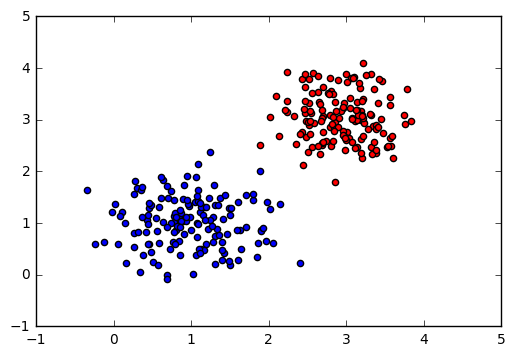

In [4]:
DIM = 2
NUM=200
COLORS = ['red', 'blue']
M1 = np.ones((DIM,))
M2 = 3 * np.ones((DIM,))
C1 = np.diag(0.3 * np.ones((DIM,)))
C2 = np.diag(0.2 * np.ones((DIM,)))

x1 = generate_gaussian(M1, C1, NUM)
x1_tr = x1[:150]
x1_val = x1[150:]
y1 = np.ones((x1.shape[0],))
y1_tr = y1[:150]
y1_val = y1[150:]
x2 = generate_gaussian(M2, C2, NUM)
x2_tr = x2[:150]
x2_val = x2[150:]
y2 = -np.ones((x2.shape[0],))
y2_tr = y2[:150]
y2_val = y2[150:]
x_tr = np.concatenate((x1_tr, x2_tr), axis = 0)
x_val= np.concatenate((x1_val, x2_val), axis = 0)
y_tr = np.concatenate((y1_tr, y2_tr), axis = 0)
y_val= np.concatenate((y1_val, y2_val), axis = 0)
print('x {} y {}'.format(x_tr.shape, y_tr.shape))
plot_data_with_labels(x_tr, y_tr)

In [5]:
linear_svm = SVM()
a =linear_svm.get_alphas(x_tr,y_tr)
w,b =linear_svm.get_w_b(x_tr,y_tr,a)

In [6]:
y_pre = linear_svm.predictor(w,b,x_val)
acc = linear_svm.accuracy(y_val,y_pre)
print(acc)

1.0


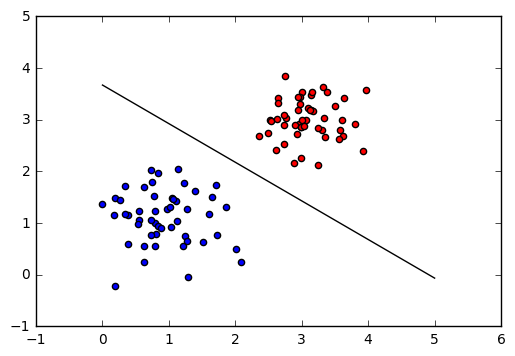

In [7]:
fig, ax = plt.subplots()
plot_separator(ax, w, b)
plot_data_with_ax(x_val, y_val, ax)
plt.show()